In [441]:
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy import where
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import AgglomerativeClustering

In [442]:
# Read the dataset using pandas
df = pd.read_csv("C:/Users/bansa/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [443]:
df.dtypes #Finding the datatype of the data frame

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [444]:
df.isna().sum() # Looking for any null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [445]:
df.groupby('Species').size() # finding how many classes are there and their number of rows

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [446]:
species = df['Species']
le = preprocessing.LabelEncoder()
iris_species = le.fit_transform(species) # encoding the lables of the classes

In [476]:
data = df.drop(['Id', 'Species'], axis = 1)
data = data.iloc[:,0:4].values # converting the data to be used for prediction into array

In [448]:
type(data)

pandas.core.frame.DataFrame

###### Hierarchical clustering method to predict the optimum number od clusters as the dataset is small

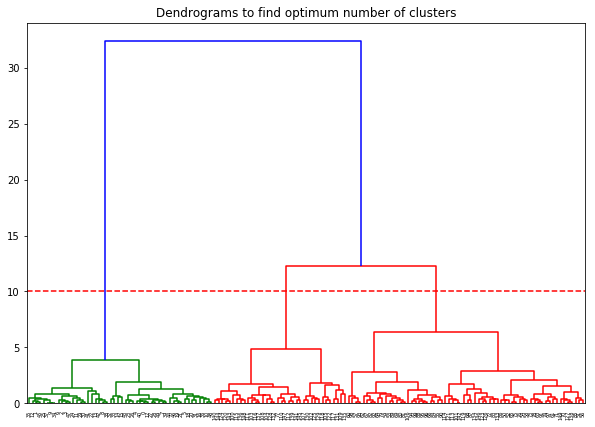

In [449]:
plt.figure(figsize=(10, 7))  
plt.title('Dendrograms to find optimum number of clusters')  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 
plt.axhline(y=10, color='r', linestyle='--') 
# a horizontal line is drwan to represent a threshold, which defines the minimum distance required to be a separate cluster.

 The horizontal line passes through 3 vertical lines resulting in 3 clusters
    i.e. optimum number of predicted clusters   **3**

In [462]:
# To be very sure of our earlier result using K-Mean for finding the optimum number of clusters using Elbow method
standard_sc = StandardScaler()
data_transform = standard_sc.fit_transform(data)
Ssd = [] # sum of squared distance

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(data_transform)
    Ssd.append(km.inertia_)

###### K-Mean clustering using elbow method for more confident decision to predicted number of clusters

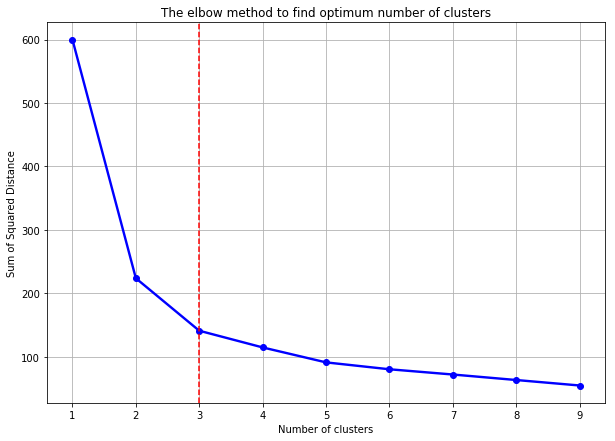

In [463]:
plt.figure(figsize=(10, 7)) 
plt.plot(range(1, 10), Ssd,'bo-', linewidth=2.4)
plt.axvline(x=3, color='r', linestyle='--') 
# a vertical line drawn to show that 3 is the optimun number of clusters from the elbow method
plt.plot ()
plt.title('The elbow method to find optimum number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distance') 
plt.grid(True)
plt.show()

The vertical line passes 3 which is the the point of inflection on the curve resulting in 3 clusters i.e. optimum number of predicted clusters **3**

In [515]:
# Hierarchical(Agglomerative) clustering for 3 clusters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y= cluster.fit_predict(data) # fit and Predict the model for the data
from sklearn.neighbors.nearest_centroid import NearestCentroid
# finding the centroid
clf = NearestCentroid() 
clf.fit(data, y)
center = clf.centroids_

###### Representation of Agglomerative Clustering on the dataset considering the optimum number of predicted clusters

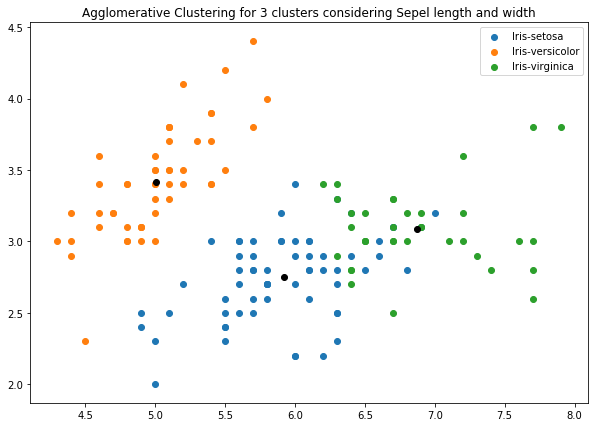

In [524]:
#scatter plot showing the predicted results
plt.figure(figsize=(10, 7)) 
for cluster in unique(ysc):
    plt.scatter(data[where(y == cluster), 0], data[where(y == cluster), 1], label= cluster)
    l=plt.legend()
l.get_texts()[0].set_text('Iris-setosa')
l.get_texts()[1].set_text('Iris-versicolor')
l.get_texts()[2].set_text('Iris-virginica')
plt.scatter(center[:, 0], center[:, 1], c='black', alpha=1.0)
plt.title('Agglomerative Clustering for 3 clusters considering Sepel length and width')
plt.show()

In [435]:
# Kmean clustering for 3 clusters
model_Kmean = KMeans(n_clusters=3, random_state=1, max_iter = 300, init = 'random')
y_Kmean = model_Kmean.fit_predict(data)
centroid = model_Kmean.cluster_centers_ # finding the centroid

###### Representation of K mean Clustering on the dataset considering the optimum number of predicted clusters to see if different methods are performing different on the dataset or not which will lead to accurate results

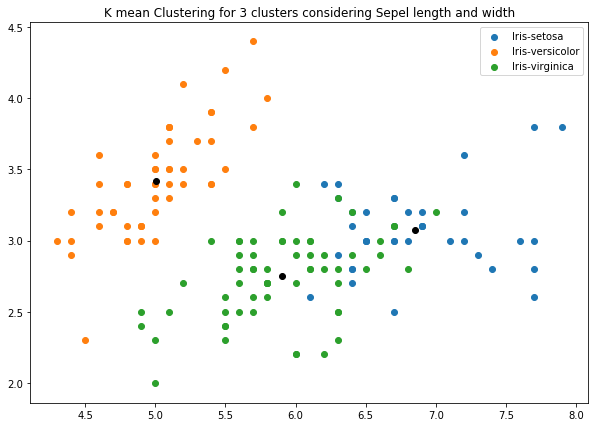

In [525]:
# scatter plot showing the predicted results with centroids for K mean
plt.figure(figsize=(10, 7)) 
for cluster in unique(ysc):
    plt.scatter(data[where(y_Kmean == cluster), 0], data[where(y_Kmean == cluster), 1],  cmap = 'viridis', label= cluster)
    l=plt.legend()
l.get_texts()[0].set_text('Iris-setosa')
l.get_texts()[1].set_text('Iris-versicolor')
l.get_texts()[2].set_text('Iris-virginica')
plt.scatter(centroid[:, 0], centroid[:, 1], c='black', alpha=1.0)
plt.title('K mean Clustering for 3 clusters considering Sepel length and width')
plt.show()

Text(0, 0.5, 'Petal Width')

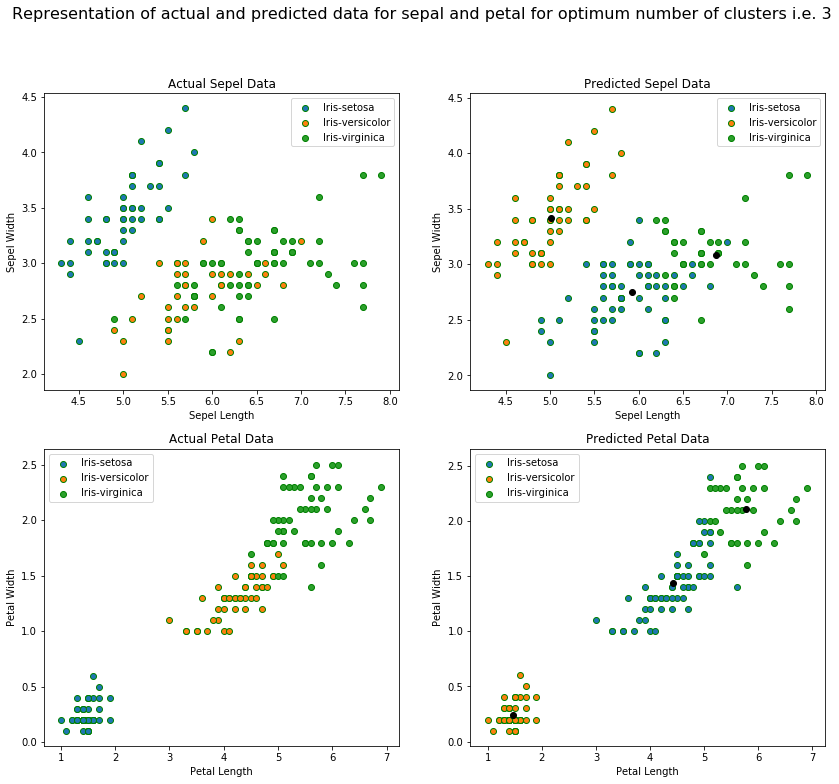

In [538]:
plt.figure(figsize=(14, 12))

plt.subplot(2,2,1)
plt.suptitle('Representation of actual and predicted data for sepal and petal for optimum number of clusters i.e. 3', fontsize=16)
for cluster in unique(iris_species):
    plt.scatter(data[where(iris_species == cluster), 0], data[where(iris_species == cluster), 1], edgecolors='green', label= cluster)
    l=plt.legend()
l.get_texts()[0].set_text('Iris-setosa')
l.get_texts()[1].set_text('Iris-versicolor')
l.get_texts()[2].set_text('Iris-virginica')
plt.title('Actual Sepel Data')
plt.xlabel('Sepel Length')
plt.ylabel('Sepel Width') 

plt.subplot(2,2,2)

for cluster in unique(y):
    plt.scatter(data[where(y == cluster), 0], data[where(y == cluster), 1], edgecolors='green', label= cluster)
    l=plt.legend()
l.get_texts()[0].set_text('Iris-setosa')
l.get_texts()[1].set_text('Iris-versicolor')
l.get_texts()[2].set_text('Iris-virginica')
plt.scatter(center[:, 0], center[:, 1], c='black', alpha=1.0)
plt.title('Predicted Sepel Data')
plt.xlabel('Sepel Length')
plt.ylabel('Sepel Width') 

plt.subplot(2,2,3)

for cluster in unique(iris_species):
    plt.scatter(data[where(iris_species == cluster), 2], data[where(iris_species == cluster), 3], edgecolors='green', label= cluster)
    l=plt.legend()
l.get_texts()[0].set_text('Iris-setosa')
l.get_texts()[1].set_text('Iris-versicolor')
l.get_texts()[2].set_text('Iris-virginica')
plt.title('Actual Petal Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width') 

plt.subplot(2,2,4)

for cluster in unique(y):
    plt.scatter(data[where(y == cluster), 2], data[where(y == cluster), 3], edgecolors='green', label= cluster)
    l=plt.legend()
l.get_texts()[0].set_text('Iris-setosa')
l.get_texts()[1].set_text('Iris-versicolor')
l.get_texts()[2].set_text('Iris-virginica')
plt.scatter(center[:, 2], center[:, 3], c='black', alpha=1.0)
plt.title('Predicted Petal Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width') 


#### Representation of acual and predicted data for sepal and petal shown above using Hierarchical(Agglomerative) clustering for optimum number of clusters i.e. 3